In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cf
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('day9_weather_rain_prediction.csv')
df

,Temperature,Humidity,WindSpeed,CloudCover,RainTomorrow
0,30,85,10,60,1
1,25,70,5,30,0
2,27,78,7,40,1
3,31,90,12,70,1
4,22,65,4,25,0
5,20,60,3,20,0
6,23,68,6,35,0
7,28,80,9,55,1
8,26,72,8,45,1
9,24,69,5,33,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Temperature   10 non-null     int64
 1   Humidity      10 non-null     int64
 2   WindSpeed     10 non-null     int64
 3   CloudCover    10 non-null     int64
 4   RainTomorrow  10 non-null     int64
dtypes: int64(5)
memory usage: 532.0 bytes


In [4]:
df.isnull().sum()

Temperature     0
Humidity        0
WindSpeed       0
CloudCover      0
RainTomorrow    0
dtype: int64

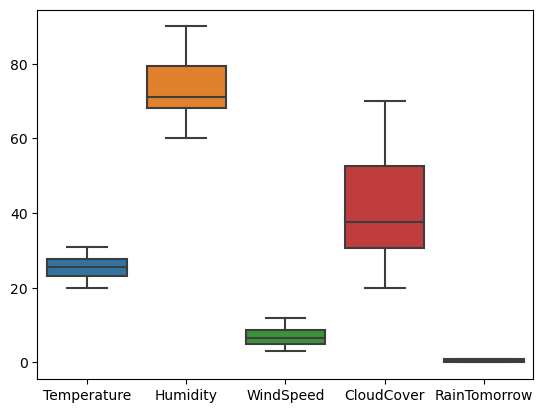

In [5]:
sns.boxplot(data=df)
plt.show()

C:\Users\Lommy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


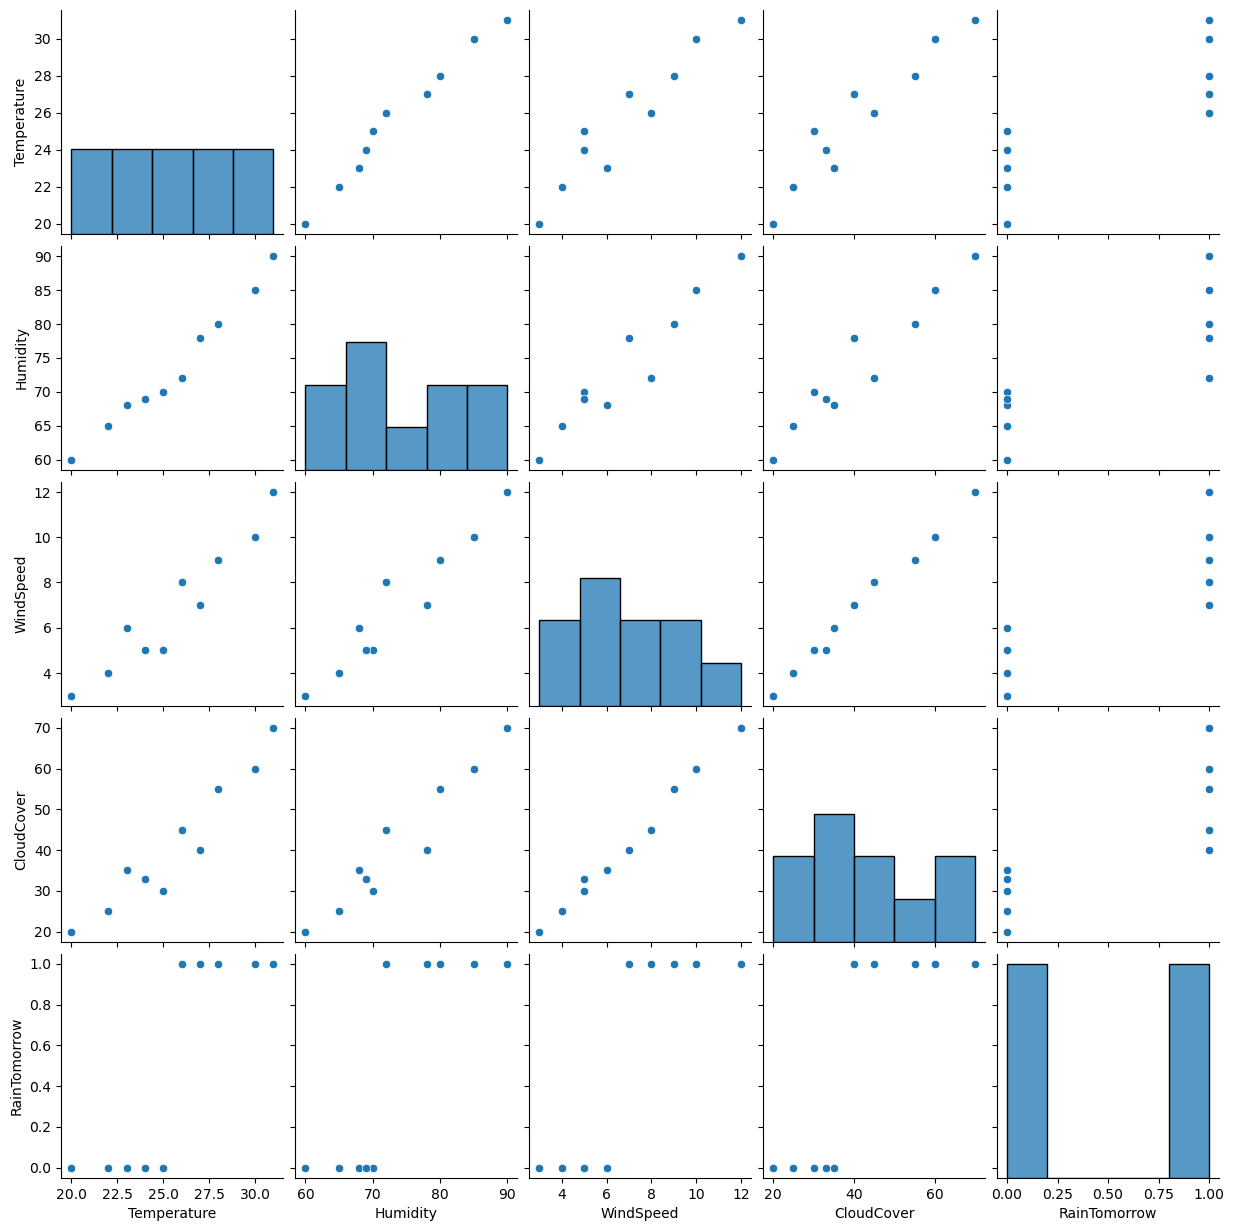

In [6]:
sns.pairplot(data = df)
plt.show()

In [7]:
y = df['RainTomorrow']
X = df.drop(columns='RainTomorrow')

In [8]:
#Decision Tree model
dt_model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=9)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred_dt = dt_model.predict(X_test)

print('Decision Trees Results')
print('Accuracy: ', accuracy_score(y_pred_dt, y_test))
print(confusion_matrix(y_pred_dt, y_test))
print(classification_report(y_pred_dt, y_test))

Decision Trees Results
Accuracy:  0.5
[[1 1]
 [0 0]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



C:\Users\Lommy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lommy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lommy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


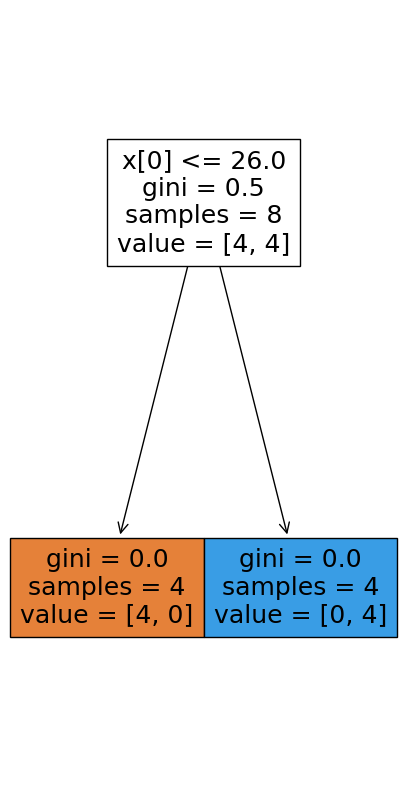

In [10]:
plt.figure(figsize=(5, 10))
plot_tree(dt_model, filled=True,  max_depth=3)
plt.show()

In [11]:
#Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [13]:
print('Random Forest Results')
print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Results
Accuracy:  1.0
[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



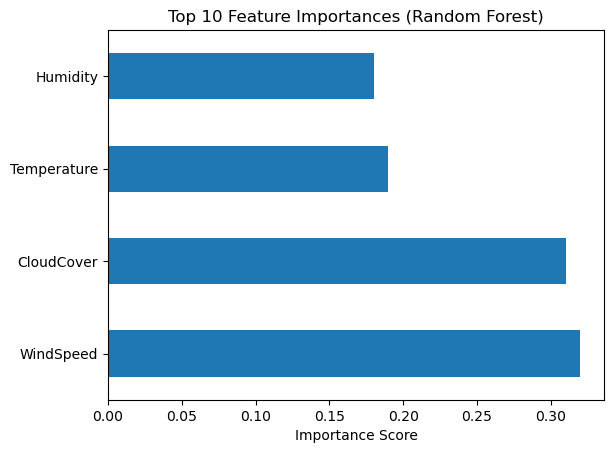

In [14]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.show()